<a href="https://colab.research.google.com/github/lokeshpara/samplegit/blob/S9/EVA_session9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA/S9/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA/S9


##IMPORTING


In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm
import numpy as np
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensor
import random
from GradCAM.gradcam_visualize import GradCAMView
import loader9
import model9
import train9
import test9

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane  ship   cat plane


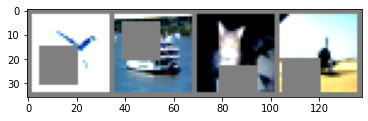

In [33]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader9.train_loader_Alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [28]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model9.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [34]:
model =  model9.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0) 

loss_func=nn.CrossEntropyLoss()
 
for epoch in range(35):
    print("Epoch:", epoch)
    train9.train(model, device, loader9.train_loader_Albumentation, optimizer, loss_func, epoch)
    # scheduler.step()
    test9.test(model, device, loader9.test_loader,loss_func,last_epoch=True)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 0


Epoch= 0 Loss=1.1493475437164307 Batch_id=781 Accuracy=49.87: 100%|██████████| 782/782 [01:06<00:00, 11.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 5796/10000 (57.96%)

Epoch: 1


Epoch= 1 Loss=1.0301649570465088 Batch_id=781 Accuracy=68.69: 100%|██████████| 782/782 [01:06<00:00, 11.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 7431/10000 (74.31%)

Epoch: 2


Epoch= 2 Loss=0.5683992505073547 Batch_id=781 Accuracy=75.59: 100%|██████████| 782/782 [01:06<00:00, 11.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 7665/10000 (76.65%)

Epoch: 3


Epoch= 3 Loss=1.2459473609924316 Batch_id=781 Accuracy=79.36: 100%|██████████| 782/782 [01:06<00:00, 11.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 7850/10000 (78.50%)

Epoch: 4


Epoch= 4 Loss=0.4634753167629242 Batch_id=781 Accuracy=81.97: 100%|██████████| 782/782 [01:06<00:00, 11.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 8144/10000 (81.44%)

Epoch: 5


Epoch= 5 Loss=0.8591780662536621 Batch_id=781 Accuracy=84.30: 100%|██████████| 782/782 [01:06<00:00, 11.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8380/10000 (83.80%)

Epoch: 6


Epoch= 6 Loss=0.26047882437705994 Batch_id=781 Accuracy=85.92: 100%|██████████| 782/782 [01:06<00:00, 11.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8240/10000 (82.40%)

Epoch: 7


Epoch= 7 Loss=0.39282771944999695 Batch_id=781 Accuracy=87.21: 100%|██████████| 782/782 [01:06<00:00, 11.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8357/10000 (83.57%)

Epoch: 8


Epoch= 8 Loss=0.4579392969608307 Batch_id=781 Accuracy=88.68: 100%|██████████| 782/782 [01:06<00:00, 11.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8425/10000 (84.25%)

Epoch: 9


Epoch= 9 Loss=0.23609405755996704 Batch_id=781 Accuracy=89.60: 100%|██████████| 782/782 [01:06<00:00, 11.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8467/10000 (84.67%)

Epoch: 10


Epoch= 10 Loss=0.5509189367294312 Batch_id=781 Accuracy=90.53: 100%|██████████| 782/782 [01:06<00:00, 11.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8593/10000 (85.93%)

Epoch: 11


Epoch= 11 Loss=0.11890077590942383 Batch_id=781 Accuracy=91.47: 100%|██████████| 782/782 [01:06<00:00, 11.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8586/10000 (85.86%)

Epoch: 12


Epoch= 12 Loss=0.30229800939559937 Batch_id=781 Accuracy=92.00: 100%|██████████| 782/782 [01:06<00:00, 11.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8638/10000 (86.38%)

Epoch: 13


Epoch= 13 Loss=0.3764548897743225 Batch_id=781 Accuracy=92.66: 100%|██████████| 782/782 [01:06<00:00, 11.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8575/10000 (85.75%)

Epoch: 14


Epoch= 14 Loss=0.27879974246025085 Batch_id=781 Accuracy=93.49: 100%|██████████| 782/782 [01:06<00:00, 11.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8722/10000 (87.22%)

Epoch: 15


Epoch= 15 Loss=0.13923102617263794 Batch_id=781 Accuracy=93.87: 100%|██████████| 782/782 [01:06<00:00, 11.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8743/10000 (87.43%)

Epoch: 16


Epoch= 16 Loss=0.23771661520004272 Batch_id=781 Accuracy=94.26: 100%|██████████| 782/782 [01:06<00:00, 11.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8591/10000 (85.91%)

Epoch: 17


Epoch= 17 Loss=0.14009657502174377 Batch_id=781 Accuracy=94.69: 100%|██████████| 782/782 [01:06<00:00, 11.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8708/10000 (87.08%)

Epoch: 18


Epoch= 18 Loss=0.19113950431346893 Batch_id=781 Accuracy=95.06: 100%|██████████| 782/782 [01:06<00:00, 11.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8782/10000 (87.82%)

Epoch: 19


Epoch= 19 Loss=0.04106834530830383 Batch_id=781 Accuracy=95.40: 100%|██████████| 782/782 [01:06<00:00, 11.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8669/10000 (86.69%)

Epoch: 20


Epoch= 20 Loss=0.05134624242782593 Batch_id=781 Accuracy=95.61: 100%|██████████| 782/782 [01:06<00:00, 11.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 8653/10000 (86.53%)

Epoch: 21


Epoch= 21 Loss=0.2345481812953949 Batch_id=781 Accuracy=95.96: 100%|██████████| 782/782 [01:06<00:00, 11.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8756/10000 (87.56%)

Epoch: 22


Epoch= 22 Loss=0.0059049129486083984 Batch_id=781 Accuracy=96.19: 100%|██████████| 782/782 [01:06<00:00, 11.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8747/10000 (87.47%)

Epoch: 23


Epoch= 23 Loss=0.0032600462436676025 Batch_id=781 Accuracy=96.42: 100%|██████████| 782/782 [01:06<00:00, 11.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8830/10000 (88.30%)

Epoch: 24


Epoch= 24 Loss=0.18141373991966248 Batch_id=781 Accuracy=96.62: 100%|██████████| 782/782 [01:06<00:00, 11.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8698/10000 (86.98%)

Epoch: 25


Epoch= 25 Loss=0.0018271207809448242 Batch_id=781 Accuracy=96.61: 100%|██████████| 782/782 [01:06<00:00, 11.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 8703/10000 (87.03%)

Epoch: 26


Epoch= 26 Loss=0.14798566699028015 Batch_id=781 Accuracy=96.92: 100%|██████████| 782/782 [01:06<00:00, 11.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8736/10000 (87.36%)

Epoch: 27


Epoch= 27 Loss=0.2273358255624771 Batch_id=781 Accuracy=96.98: 100%|██████████| 782/782 [01:06<00:00, 11.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8884/10000 (88.84%)

Epoch: 28


Epoch= 28 Loss=0.08858704566955566 Batch_id=781 Accuracy=97.13: 100%|██████████| 782/782 [01:06<00:00, 11.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8756/10000 (87.56%)

Epoch: 29


Epoch= 29 Loss=0.3012620210647583 Batch_id=781 Accuracy=97.24: 100%|██████████| 782/782 [01:07<00:00, 11.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8814/10000 (88.14%)

Epoch: 30


Epoch= 30 Loss=0.12704172730445862 Batch_id=781 Accuracy=97.26: 100%|██████████| 782/782 [01:07<00:00, 11.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8887/10000 (88.87%)

Epoch: 31


Epoch= 31 Loss=0.11709188669919968 Batch_id=781 Accuracy=97.50: 100%|██████████| 782/782 [01:07<00:00, 11.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8772/10000 (87.72%)

Epoch: 32


Epoch= 32 Loss=0.14129510521888733 Batch_id=781 Accuracy=97.55: 100%|██████████| 782/782 [01:06<00:00, 11.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8878/10000 (88.78%)

Epoch: 33


Epoch= 33 Loss=0.03980901837348938 Batch_id=781 Accuracy=97.50: 100%|██████████| 782/782 [01:07<00:00, 11.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8829/10000 (88.29%)

Epoch: 34


Epoch= 34 Loss=0.08005458116531372 Batch_id=781 Accuracy=97.78: 100%|██████████| 782/782 [01:07<00:00, 11.65it/s]



Test set: Average loss: 0.0078, Accuracy: 8889/10000 (88.89%)



Text(0.5, 1.0, 'Test Accuracy')

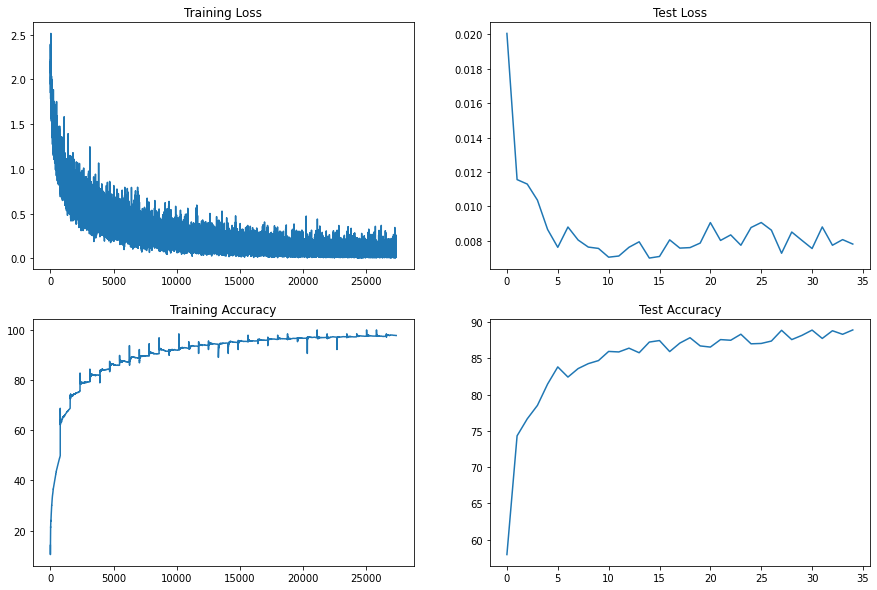

In [40]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train9.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train9.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test9.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test9.test_acc)
axs[1, 1].set_title("Test Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  plane   cat horse  bird


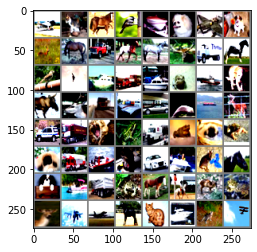

In [36]:
dataiter = iter(loader9.test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [37]:
outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  plane  frog horse  bird


In [43]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader9.test_loader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:03<00:00, 46.32it/s]

Accuracy of plane : 93 %
Accuracy of   car : 95 %
Accuracy of  bird : 88 %
Accuracy of   cat : 79 %
Accuracy of  deer : 93 %
Accuracy of   dog : 79 %
Accuracy of  frog : 94 %
Accuracy of horse : 92 %
Accuracy of  ship : 89 %
Accuracy of truck : 90 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


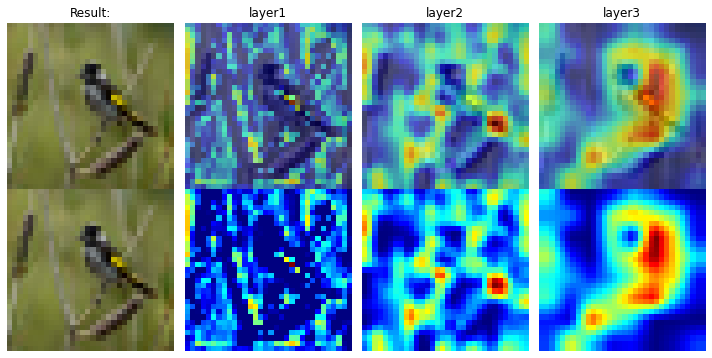

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

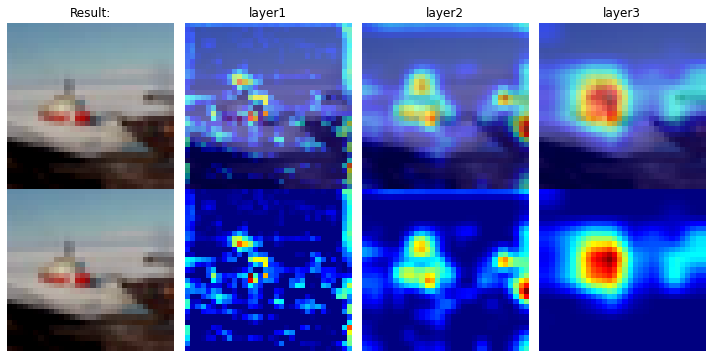

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

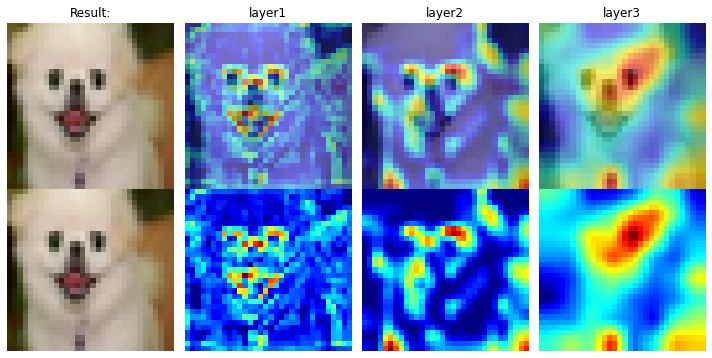

<Figure size 432x288 with 0 Axes>

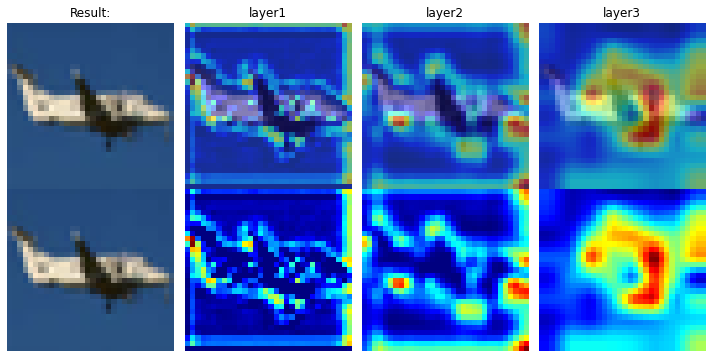

<Figure size 432x288 with 0 Axes>

In [39]:
layers = ['layer1', 'layer2', 'layer3']
grad_cam = GradCAMView(model, layers, device, loader9.mean, loader9.std)
images = [x['image'] for x in random.sample(test9.correct_pred, 4)]
grad_cam(images, "grad_cam")